In [6]:
import pandas as pd
import math
import numpy as np
tickers = pd.read_csv (r'C:\Users\HP\Downloads\tickers.csv')
print(tickers)
univ_h=pd.read_csv(r'C:\Users\HP\Downloads\univ_h.csv',index_col=0)

year2017=univ_h.loc[2017] #extracted year 2017 and tickers data

#made dataframe for year2017 , dropped #NA values
new1=tickers.assign(year2017=year2017.tolist())  
  
new1=new1.dropna()

#sorted by GICS values
new1=new1.sort_values('GICS')

#dropped 0 values because it means it wasn't in the universe that year
new1.drop(new1[new1['year2017'] == 0].index, inplace = True)

#extracted gics and turned to string and cut the string to the first 6 digits
gics1=new1.iloc[:,1]
gics1=gics1.tolist()
for i in range (len(gics1)):
    a=gics1[i]
    b=str(a)
    gics1[i]=b[:6]

#put back cutted gics values
new1=new1.assign(GICS=gics1)
#counted number of stocks by industry
industries=new1['GICS'].value_counts()




      tickers        GICS
0    0111145D         NaN
1    0202445Q         NaN
2    0203524D         NaN
3    0226226D         NaN
4    0544749D         NaN
..        ...         ...
917       YUM  25301040.0
918       ZBH  35101010.0
919      ZBRA  45203010.0
920      ZION  40101015.0
921       ZTS  35202010.0

[922 rows x 2 columns]


101020    29
601010    28
403010    21
255040    20
351020    19
          ..
351030     1
253020     1
551040     1
551050     1
601020     1
Name: GICS, Length: 62, dtype: int64

In [3]:
year2022=univ_h.loc[2022]
new2=tickers.assign(year2022=year2022.tolist())
new2=new2.dropna()
new2=new2.sort_values('GICS')
new2.drop(new2[new2['year2022'] == 0].index, inplace = True)
gics2=new2.iloc[:,1]
gics2=gics2.tolist()
for i in range (len(gics2)):
    a=gics2[i]
    b=str(a)
    gics2[i]=b[:6]
new2=new2.assign(GICS=gics2)
new2['GICS'].value_counts()

601010    28
403010    22
402030    21
453010    20
451020    19
          ..
551020     1
201030     1
551040     1
551050     1
601020     1
Name: GICS, Length: 63, dtype: int64

In [4]:
#industry MCD belongs to: 253010


In [5]:
ind=[]
ticker2022=new2.iloc[:,0].tolist()

for i in range (len(new2)):
    if gics2[i]=='253010':
        ind.append(ticker2022[i])
print('number of stocks in the industry 253010:',len(ind))
print(ind)

number of stocks in the industry 253010: 18
['CZR', 'PENN', 'MGM', 'LVS', 'WYNN', 'NCLH', 'MAR', 'BKNG', 'EXPE', 'CCL', 'HLT', 'RCL', 'DRI', 'CMG', 'SBUX', 'DPZ', 'YUM', 'MCD']


In [6]:

r1=[]
r2=[]
r3=[]
r4=[]
r5=[]
r6=[]
r7=[]
r8=[]
r9=[]
r10=[]
r11=[]
r12=[]
r13=[]
r14=[]
r15=[]
r16=[]
r17=[]
r18=[]
r_ind=[]
adj=pd.read_csv (r'C:\Users\HP\Downloads\adjusted.csv')
#EXTRACT ROWS FROM 20170703-20220630, and columns that belongs to 253010 industry
adj.drop(adj[adj['Date'] <20170703].index, inplace=True)
newadj = adj[ind].copy()


In [7]:
for i in range (len(newadj)-1):
    r1.append(math.log(newadj['CZR'][i+1+3650]/newadj['CZR'][i+3650]))
    r2.append(math.log(newadj['PENN'][i+1+3650]/newadj['PENN'][i+3650]))
    r3.append(math.log(newadj['MGM'][i+1+3650]/newadj['MGM'][i+3650]))
    r4.append(math.log(newadj['LVS'][i+1+3650]/newadj['LVS'][i+3650]))
    r5.append(math.log(newadj['WYNN'][i+1+3650]/newadj['WYNN'][i+3650]))
    r6.append(math.log(newadj['NCLH'][i+1+3650]/newadj['NCLH'][i+3650]))
    r7.append(math.log(newadj['MAR'][i+1+3650]/newadj['MAR'][i+3650]))
    r8.append(math.log(newadj['BKNG'][i+1+3650]/newadj['BKNG'][i+3650]))
    r9.append(math.log(newadj['EXPE'][i+1+3650]/newadj['EXPE'][i+3650]))
    r10.append(math.log(newadj['CCL'][i+1+3650]/newadj['CCL'][i+3650]))
    r11.append(math.log(newadj['HLT'][i+1+3650]/newadj['HLT'][i+3650]))
    r12.append(math.log(newadj['RCL'][i+1+3650]/newadj['RCL'][i+3650]))
    r13.append(math.log(newadj['DRI'][i+1+3650]/newadj['DRI'][i+3650]))
    r14.append(math.log(newadj['CMG'][i+1+3650]/newadj['CMG'][i+3650]))
    r15.append(math.log(newadj['SBUX'][i+1+3650]/newadj['SBUX'][i+3650]))
    r16.append(math.log(newadj['DPZ'][i+1+3650]/newadj['DPZ'][i+3650]))
    r17.append(math.log(newadj['YUM'][i+1+3650]/newadj['YUM'][i+3650]))
    r18.append(math.log(newadj['MCD'][i+1+3650]/newadj['MCD'][i+3650]))
    r_ind.append((r1[i]+r2[i]+r3[i]+r4[i]+r5[i]+r6[i]+r7[i]+r8[i]+r9[i]+r10[i]+r11[i]+r12[i]+r13[i]+r14[i]+r15[i]+r16[i]+r17[i]+r18[i])/18)
    


beta: 0.3954218498716628
alpha: 0.0004899179315232417
R^2: 0.3613425679443344


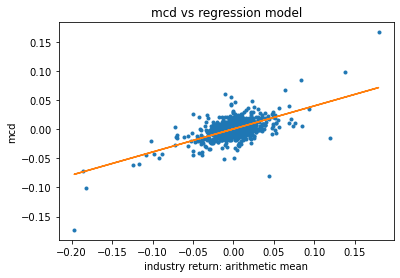

In [8]:
import matplotlib.pyplot as plt

y_pred=[]
residuals=[]
beta, alpha = np.polyfit(r_ind, r18, 1)
for i in range(len(r_ind)):
    y_pred.append( beta*r_ind[i] + alpha)
plt.plot(r_ind, r18, '.')
plt.plot(r_ind, y_pred)
plt.title('mcd vs regression model')
plt.xlabel('industry return: arithmetic mean')
plt.ylabel('mcd')
print('beta:',beta)
print('alpha:',alpha)
y_bar=np.mean(r18)
RSS=0
TSS=0
for i in range(len(r18)):
    residuals.append(r18[i]-y_pred[i])
    RSS=RSS+(r18[i]-y_pred[i])**2
    TSS=TSS+(r18[i]-y_bar)**2
r_squared=1-RSS/TSS
print('R^2:',r_squared)

beta: 0.6497831270356611
alpha: 0.00035015869023794605
R^2: 0.5559916657447233


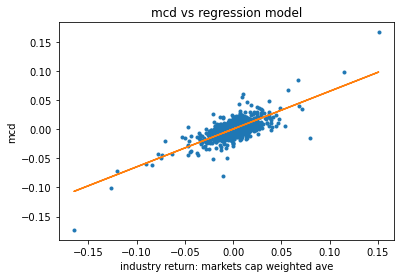

In [9]:
mktcap=pd.read_csv (r'C:\Users\HP\Downloads\mktcap.csv',index_col=0)
caps=[]
for k in ind:
    caps.append(mktcap[k][20220103].tolist())
sumcaps=np.sum(caps)  

r_ind1=[] 
for i in range(len(r18)):
    r_ind1.append((caps[0]*r1[i]+caps[1]*r2[i]+caps[2]*r3[i]+caps[3]*r4[i]+caps[4]*r5[i]+caps[5]*r6[i]+
                   caps[6]*r7[i]+caps[7]*r8[i]+caps[8]*r9[i]+caps[9]*r10[i]+caps[10]*r11[i]+
                   caps[11]*r12[i]+caps[12]*r13[i]+caps[13]*r14[i]+caps[14]*r15[i]+caps[15]*r16[i]+
                   caps[16]*r17[i]+caps[17]*r18[i])/sumcaps)
    
y_pred=[]
residuals=[]
beta, alpha = np.polyfit(r_ind1, r18, 1)
for i in range(len(r_ind1)):
    y_pred.append( beta*r_ind1[i] + alpha)
plt.plot(r_ind1, r18, '.')
plt.plot(r_ind1, y_pred)
plt.title('mcd vs regression model')
plt.xlabel('industry return: markets cap weighted ave')
plt.ylabel('mcd')
print('beta:',beta)
print('alpha:',alpha)
y_bar=np.mean(r18)
RSS=0
TSS=0
for i in range(len(r18)):
    residuals.append(r18[i]-y_pred[i])
    RSS=RSS+(r18[i]-y_pred[i])**2
    TSS=TSS+(r18[i]-y_bar)**2
r_squared=1-RSS/TSS
print('R^2:',r_squared)